In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import metrics

In [5]:
df = pd.DataFrame(cancer['data'],columns = cancer['feature_names'])
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
508,16.300,15.70,104.70,819.8,0.09427,0.06712,0.055260,0.04563,0.1711,0.05657,...,17.32,17.76,109.80,928.2,0.1354,0.1361,0.19470,0.13570,0.2300,0.07230
246,13.200,17.43,84.13,541.6,0.07215,0.04524,0.043360,0.01105,0.1487,0.05635,...,13.94,27.82,88.28,602.0,0.1101,0.1508,0.22980,0.04970,0.2767,0.07198
259,15.530,33.56,103.70,744.9,0.10630,0.16390,0.175100,0.08399,0.2091,0.06650,...,18.49,49.54,126.30,1035.0,0.1883,0.5564,0.57030,0.20140,0.3512,0.12040
121,18.660,17.12,121.40,1077.0,0.10540,0.11000,0.145700,0.08665,0.1966,0.06213,...,22.25,24.90,145.40,1549.0,0.1503,0.2291,0.32720,0.16740,0.2894,0.08456
424,9.742,19.12,61.93,289.7,0.10750,0.08333,0.008934,0.01967,0.2538,0.07029,...,11.21,23.17,71.79,380.9,0.1398,0.1352,0.02085,0.04589,0.3196,0.08009


In [6]:
df.shape

(569, 30)

In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [40]:
from sklearn.cluster import KMeans

In [42]:
clusters_error = []
for i in range(1,21):
    cluster = KMeans(i)
    cluster.fit(df)
    clusters_error.append(cluster.inertia_)

In [55]:
# WSS
clusters_df = pd.DataFrame({'Num_clusters':range(1,21),'clusters_error':clusters_error})
clusters_df

,Num_clusters,clusters_error
0,1,2.566772e+08
1,2,7.794310e+07
2,3,4.730326e+07
3,4,2.922654e+07
4,5,2.053524e+07
5,6,1.657743e+07
6,7,1.325239e+07
7,8,1.121453e+07
8,9,9.440097e+06
9,10,8.393718e+06


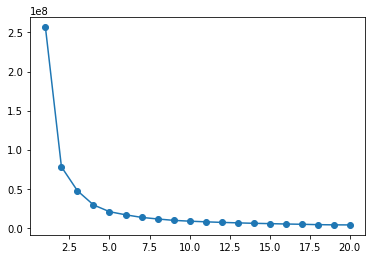

In [58]:
plt.plot(clusters_df.Num_clusters, clusters_df.clusters_error,marker = 'o')
plt.xticks=range(1,21)
plt.show()

In [59]:
kmeans = KMeans(n_clusters = 2).fit(df)

In [60]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
target = kmeans.labels_
target

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [63]:
df['target'] = target

In [64]:
df.shape

(569, 31)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [66]:
x_un = df.drop(['target'],axis =1)
y_un =df['target']

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc = StandardScaler()
x_un = sc.fit_transform(x_un)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
xtrain,xtest,ytrain,ytest = train_test_split(x_un,y_un, test_size = 0.3, random_state = 0)

In [74]:
xtrain.shape

(398, 30)

In [75]:
xtest.shape

(171, 30)

In [76]:
ytrain.shape

(398,)

In [78]:
ytest.shape

(171,)

In [79]:
pca = PCA(n_components = 2)

In [80]:
xtrain1 = pca.fit_transform(xtrain)
xtest1 = pca.transform(xtest)

In [81]:
xtrain1

array([[-2.29539780e+00,  1.19389620e+00],
       [-3.62927759e+00,  7.09290144e-01],
       [-2.42959416e+00, -5.30753681e-02],
       [ 5.75990970e-01, -3.40079795e+00],
       [-4.69223356e+00,  3.26401987e+00],
       [-3.94865829e+00,  9.30783768e-01],
       [-1.60932604e+00,  5.58222628e-01],
       [-3.70673944e+00,  4.79769675e-02],
       [-5.62639919e-01, -2.01373295e+00],
       [ 6.07777818e+00, -2.14214914e-01],
       [-1.83356867e+00,  8.26143605e-01],
       [-1.54723098e+00, -1.17566761e+00],
       [-3.86482554e-01, -1.30929793e+00],
       [-2.44804730e+00,  8.20714329e-01],
       [-3.45039074e+00,  5.34884087e-01],
       [-1.10998778e+00, -1.35098263e+00],
       [-1.48090690e+00,  1.50527323e+00],
       [ 4.82462594e+00, -1.85250913e+00],
       [-4.28835082e+00, -1.19681808e+00],
       [-2.49013327e+00,  2.66224936e+00],
       [ 2.40628144e+00, -2.38583269e+00],
       [ 2.90833445e+00,  3.82603833e+00],
       [-2.12538900e+00,  1.80526539e+00],
       [-1.

In [82]:
xtest1

array([[ 2.0698035 ,  2.25985685],
       [-2.73135017, -1.72087648],
       [-3.0623634 , -2.41244403],
       [-2.64752297, -2.65388029],
       [-3.703887  , -1.63108828],
       [-2.37611318,  0.73695026],
       [-1.74575183,  0.83788585],
       [-3.35235215, -0.16317476],
       [-4.30454469,  2.1420407 ],
       [-2.62774371,  3.22131908],
       [ 1.83425115,  2.41406498],
       [-1.5101148 , -1.64878485],
       [-4.11464728,  0.68359145],
       [-0.61044594, -3.06854233],
       [ 1.1905405 ,  1.13478386],
       [ 2.74817059,  1.53513578],
       [ 1.04928282,  6.5582312 ],
       [ 3.5110661 , -3.59986334],
       [ 4.62367385,  0.18082938],
       [ 7.23679282, -1.55974134],
       [ 2.6186904 ,  4.35942799],
       [ 2.54301054,  0.85249488],
       [-1.28822457,  0.53349784],
       [-2.98311573, -0.54071362],
       [ 3.73075145, -1.60618363],
       [-3.33180433, -1.16945999],
       [-4.56035273, -1.39722809],
       [ 3.9184302 ,  5.29481826],
       [-3.04380777,

In [84]:
pca.explained_variance_

array([13.33924504,  5.79951949])

In [85]:
pca.explained_variance_ratio_

array([0.44304792, 0.19262447])

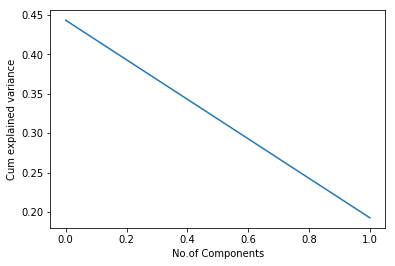

In [86]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('No.of Components')
plt.ylabel('Cum explained variance')
plt.show()

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [89]:
from sklearn import model_selection

In [90]:
DT = DecisionTreeClassifier()
NB = GaussianNB()
KNN = KNeighborsClassifier()
RF = RandomForestClassifier()
LR = LogisticRegression()
SVM = SVC()

In [94]:
unsup_accu = []
for name,model in zip(['DT','NB','KNN','RF','LR','SVM'],[DT,NB,KNN,RF,LR,SVM]):
    model.fit(xtrain1,ytrain)
    ypred = model.predict(xtest1)
    accu = metrics.accuracy_score(ypred,ytest)
    unsup_accu.append([name,accu])
    print('Accuracy score of the unsupervised model %s: %0.02f'%(name,accu))

Accuracy score of the unsupervised model DT: 0.96
Accuracy score of the unsupervised model NB: 0.98
Accuracy score of the unsupervised model KNN: 0.97
Accuracy score of the unsupervised model RF: 0.99
Accuracy score of the unsupervised model LR: 0.98
Accuracy score of the unsupervised model SVM: 0.96


In [92]:
import warnings

In [93]:
warnings.filterwarnings('ignore')

# Supervised

In [95]:
real_target = cancer.target

In [96]:
df1 = df.copy()

In [98]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [99]:
df1.drop(['target'], axis = 1, inplace = True)

In [101]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [102]:
df1['real_target'] = real_target

In [103]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,real_target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [104]:
x = df1.drop(['real_target'], axis = 1)
y = df1['real_target']

In [118]:
xtrain_sup,xtest_sup,ytrain_sup,ytest_sup = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [119]:
xtrain_sup.shape

(398, 30)

In [120]:
xtest_sup.shape

(171, 30)

In [121]:
ytrain_sup.shape

(398,)

In [122]:
ytest_sup.shape

(171,)

In [123]:
pca_sup = PCA(n_components = 2)
xtrain_sup = pca_sup.fit_transform(xtrain_sup)
xtest_sup = pca_sup.transform(xtest_sup)

In [126]:
sup_accu = []
for name,model in zip(['DT','NB','KNN','RF','LR','SVM'],[DT,NB,KNN,RF,LR,SVM]):
    model.fit(xtrain_sup,ytrain_sup)
    ypred = model.predict(xtest_sup)
    accu = metrics.accuracy_score(ypred,ytest_sup)
    sup_accu.append([name,accu])
    print('Accuracy score of the supervised model %s: %0.02f'%(name,accu))

Accuracy score of the supervised model DT: 0.92
Accuracy score of the supervised model NB: 0.91
Accuracy score of the supervised model KNN: 0.95
Accuracy score of the supervised model RF: 0.93
Accuracy score of the supervised model LR: 0.95
Accuracy score of the supervised model SVM: 0.63


In [127]:
table = pd.DataFrame({'model':['DT','NB','KNN','RF','LR','SVM'],'Supervised':[0.92,0.91,0.95,0.93,0.95,0.63],
                      'Unsupervised':[0.96,0.98,0.97,0.99,0.98,0.96]})
table

,model,Supervised,Unsupervised
0,DT,0.92,0.96
1,NB,0.91,0.98
2,KNN,0.95,0.97
3,RF,0.93,0.99
4,LR,0.95,0.98
5,SVM,0.63,0.96


# Unsupervised models predicts the data more precisely than supervised models